In [2]:
import pycaret
import pandas as pd

In [3]:
# ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏ü‡∏•‡πå CSV
data = pd.read_csv('../export_data/export-pm25_eng-1d.csv')

In [4]:
# ‡∏ï‡∏±‡πâ‡∏á 'timestamp' ‡πÄ‡∏õ‡πá‡∏ô index ‡∏´‡∏≤‡∏Å‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏ó‡∏≥
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ freq ‡πÉ‡∏´‡πâ‡∏Å‡∏±‡∏ö index
data = data.asfreq('D')  # 'D' ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏≤‡∏¢‡∏ß‡∏±‡∏ô

In [5]:
data.tail()

Unnamed: 0      timezone   humidity      pm_10  \
timestamp                                                             
2025-02-07 07:00:00       657.0  Asia/Bangkok  70.933952  34.743259   
2025-02-08 07:00:00       658.0  Asia/Bangkok  69.348548  30.654249   
2025-02-09 07:00:00       659.0  Asia/Bangkok  69.916384  28.971065   
2025-02-10 07:00:00       660.0  Asia/Bangkok  71.226336  30.652667   
2025-02-11 07:00:00       661.0  Asia/Bangkok  68.159624  32.532955   

                        pm_2_5  pm_2_5_sp  temperature  
timestamp                                               
2025-02-07 07:00:00  29.321219  26.166471    28.271927  
2025-02-08 07:00:00  26.000000  22.380675    28.385596  
2025-02-09 07:00:00  24.616898  20.976852    28.373742  
2025-02-10 07:00:00  25.856981  22.374574    28.251201  
2025-02-11 07:00:00  27.522727  24.120455    28.693799

In [6]:
# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°
print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:")
print(data[data.isnull().any(axis=1)])

# ‡πÄ‡∏ï‡∏¥‡∏°‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏≤‡∏£ interpolate ‡πÅ‡∏ö‡∏ö‡πÄ‡∏™‡πâ‡∏ô‡∏ï‡∏£‡∏á
data.interpolate(method='linear', inplace=True)

# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤ NaN ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡πÄ‡∏ï‡∏¥‡∏° (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ)
missing_rows_after = data[data.isnull().any(axis=1)]
if not missing_rows_after.empty:
    print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏´‡∏•‡∏±‡∏á‡πÄ‡∏ï‡∏¥‡∏°:")
    print(missing_rows_after)
else:
    print("‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß")


row = data.loc["2023-09-30 07:00:00"]
row

‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:
                     Unnamed: 0 timezone  humidity  pm_10  pm_2_5  pm_2_5_sp  \
timestamp                                                                      
2023-04-02 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-15 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-16 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-17 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-18 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-19 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-20 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-21 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-22 07:00:00         NaN      NaN       NaN    NaN     NaN        NaN   
2023-06-23 07:00:00         NaN      NaN      

Unnamed: 0            165.0
timezone       Asia/Bangkok
humidity          86.678155
pm_10             82.662011
pm_2_5            67.011173
pm_2_5_sp         97.072626
temperature       28.610736
Name: 2023-09-30 07:00:00, dtype: object

In [7]:
data = data[['humidity']]

In [8]:
data["year"] = data.index.year
data["month"] = data.index.month
data["day"] = data.index.day
data["day_of_week"] = data.index.dayofweek  # 0 = Monday, 6 = Sunday
data["week_of_year"] = data.index.isocalendar().week  # ‡∏Ñ‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô int64

In [9]:
# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ index ‡πÄ‡∏õ‡πá‡∏ô datetime ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß
def assign_season(month):
    if month in [2, 3, 4]:  # ‡∏Å.‡∏û. - ‡πÄ‡∏°.‡∏¢.
        return "summer"        # ‡∏§‡∏î‡∏π‡∏£‡πâ‡∏≠‡∏ô
    elif month in [5, 6, 7]:  # ‡∏û.‡∏Ñ. - ‡∏Å.‡∏Ñ.
        return "early_rainy"   # ‡∏ï‡πâ‡∏ô‡∏§‡∏î‡∏π‡∏ù‡∏ô
    else:  # ‡∏™.‡∏Ñ. - ‡∏°.‡∏Ñ.
        return "late_rainy"    # ‡∏õ‡∏•‡∏≤‡∏¢‡∏§‡∏î‡∏π‡∏ù‡∏ô

season_mapping = {'summer': 0, 'early_rainy': 1, 'late_rainy': 2}
data["season"] = data.index.month.map(assign_season)
data['season'] = data['season'].map(season_mapping)

In [10]:
data["is_weekend"] = data.index.dayofweek.isin([5, 6]).astype(int)

In [11]:
import pandas as pd
import numpy as np

# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤‡∏°‡∏µ DataFrame data ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß
# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_year
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['day_of_year'] = data['date'].dt.dayofyear

# # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå month_sin ‡πÅ‡∏•‡∏∞ month_cos
# data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
# data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

# # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_week_sin ‡πÅ‡∏•‡∏∞ day_of_week_cos
# data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
# data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

lag_size = 7
for i in range(1,lag_size+1):
    data[f'humidity_lag_{i}'] = data['humidity'].shift(i)

In [12]:
# data["temp_diff"] = data["temperature"].diff()

In [13]:
data.columns

Index(['humidity', 'year', 'month', 'day', 'day_of_week', 'week_of_year',
       'season', 'is_weekend', 'date', 'day_of_year', 'humidity_lag_1',
       'humidity_lag_2', 'humidity_lag_3', 'humidity_lag_4', 'humidity_lag_5',
       'humidity_lag_6', 'humidity_lag_7'],
      dtype='object')

In [14]:
data_filtered = data.loc['2023-09':]  # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏±‡πâ‡∏á‡πÅ‡∏ï‡πà‡∏Å‡∏±‡∏ô‡∏¢‡∏≤‡∏¢‡∏ô 2023 ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏ô‡πÑ‡∏õ

<Axes: xlabel='timestamp'>

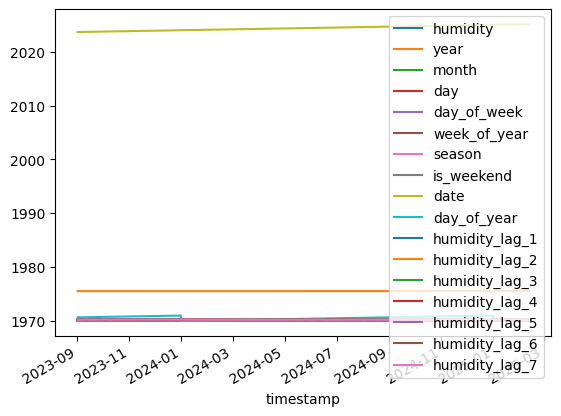

In [15]:
data_filtered.plot()

In [16]:
# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
total_data = len(data_filtered)

# ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô test data
test_days = 30

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏™‡∏±‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á 30 ‡∏ß‡∏±‡∏ô‡πÉ‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
test_size = test_days / total_data
test_size

0.05660377358490566

In [17]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_filtered, test_size=test_size, shuffle=False)

In [18]:
train_data.shape

(500, 17)

In [19]:
test_data.shape

(30, 17)

In [20]:
test_data.head(1)

humidity  year  month  day  day_of_week  week_of_year  \
timestamp                                                                     
2025-01-13 07:00:00  78.292202  2025      1   13            0             3   

                     season  is_weekend       date  day_of_year  \
timestamp                                                         
2025-01-13 07:00:00       2           0 2025-01-13           13   

                     humidity_lag_1  humidity_lag_2  humidity_lag_3  \
timestamp                                                             
2025-01-13 07:00:00       85.379806       73.568381       70.491487   

                     humidity_lag_4  humidity_lag_5  humidity_lag_6  \
timestamp                                                             
2025-01-13 07:00:00       70.983573       71.168637       70.630299   

                     humidity_lag_7  
timestamp                            
2025-01-13 07:00:00       72.844643

In [21]:
test_data.tail(1)

humidity  year  month  day  day_of_week  week_of_year  \
timestamp                                                                     
2025-02-11 07:00:00  68.159624  2025      2   11            1             7   

                     season  is_weekend       date  day_of_year  \
timestamp                                                         
2025-02-11 07:00:00       0           0 2025-02-11           42   

                     humidity_lag_1  humidity_lag_2  humidity_lag_3  \
timestamp                                                             
2025-02-11 07:00:00       71.226336       69.916384       69.348548   

                     humidity_lag_4  humidity_lag_5  humidity_lag_6  \
timestamp                                                             
2025-02-11 07:00:00       70.933952       69.511783       71.500943   

                     humidity_lag_7  
timestamp                            
2025-02-11 07:00:00       70.266522

In [22]:
test_data.columns

Index(['humidity', 'year', 'month', 'day', 'day_of_week', 'week_of_year',
       'season', 'is_weekend', 'date', 'day_of_year', 'humidity_lag_1',
       'humidity_lag_2', 'humidity_lag_3', 'humidity_lag_4', 'humidity_lag_5',
       'humidity_lag_6', 'humidity_lag_7'],
      dtype='object')

In [23]:
# from pycaret.time_series import *
from pycaret.regression import RegressionExperiment
exp1 = RegressionExperiment()
exp1.setup(data=train_data, target='humidity', session_id=123, fold=12, iterative_imputation_iters=100, remove_outliers = True)
# iterative_imputation_iters=100, remove_outliers = True

In [24]:
# compare baseline models
best = exp1.compare_models(n_select=15)

In [25]:
# model_1 = exp1.create_model('rf')
model_1 = exp1.create_model('rf')
model_2 = exp1.create_model('ridge')
model_3 = exp1.create_model('br')

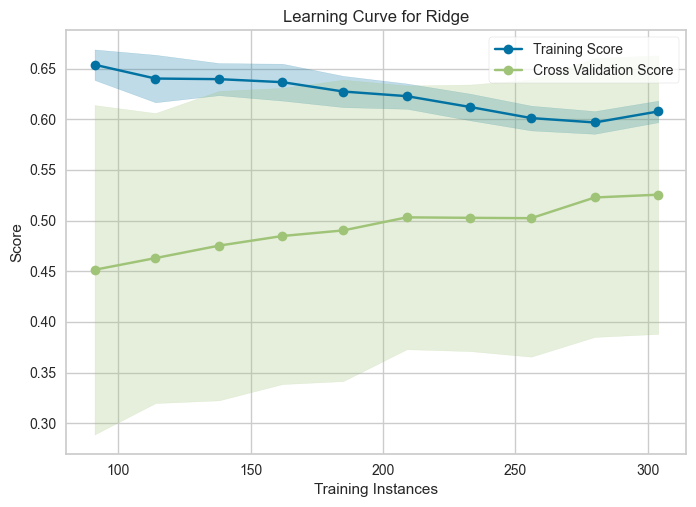

In [26]:
exp1.plot_model(model_2, 'learning')

In [ ]:
stop

In [27]:
predictions = exp1.predict_model(model_2, data=test_data)
predict_v = predictions['prediction_label']
real = test_data['humidity']

# ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ 1 ‡∏ß‡∏±‡∏ô‡∏Ç‡πâ‡∏≤‡∏á‡∏´‡∏ô‡πâ‡∏≤ ‡∏ï‡πâ‡∏≠‡∏á‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÄ‡∏ú‡∏∑‡πà‡∏≠ 2 ‡∏ß‡∏±‡∏ô

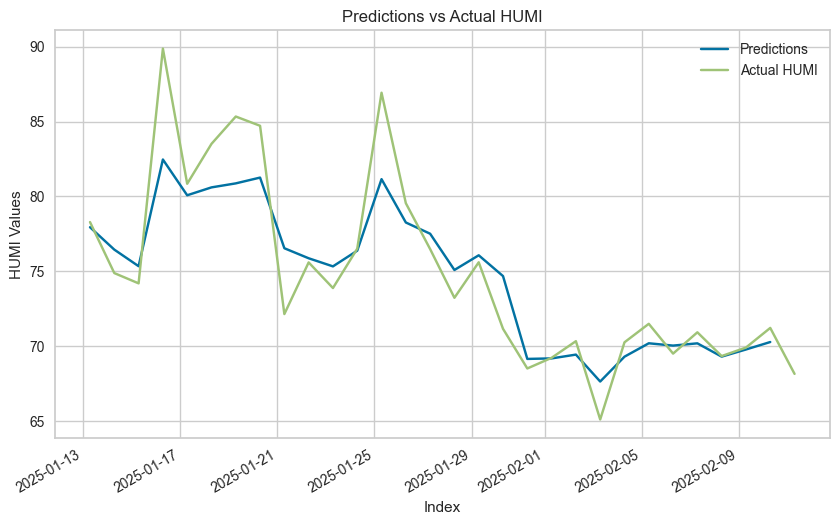

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ result ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏° predictions ‡∏Å‡∏±‡∏ö pm_10
result = pd.concat([predict_v.shift(-1), test_data['humidity']], axis=1)
result.columns = ['Predictions', 'Actual HUMI']  # ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
result.plot(figsize=(10, 6))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Predictions vs Actual HUMI')
plt.xlabel('Index')
plt.ylabel('HUMI Values')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

In [29]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_true = test_data["humidity"][:"2025-2-10"]
y_pred = predict_v.shift(-1).dropna(axis=0)

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Accuracy as (1 - (MAE / mean_actual)) * 100
mean_actual = np.mean(y_true)  # Mean of actual values
accuracy = (1 - (mae / mean_actual)) * 100  # Accuracy in percentage

# Print Results
print(f"R¬≤ Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Absolute Error (MAE): {mae:.4f}")  # Lower is better
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")  # Lower is better
print(f"Accuracy: {accuracy:.2f}%")  # Accuracy percentage

R¬≤ Score: 0.8292
Mean Absolute Error (MAE): 1.7577
Root Mean Squared Error (RMSE): 2.5266
Accuracy: 97.66%


In [30]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Extract actual values and predicted values
y_true = test_data["humidity"][:"2025-2-10"]
y_pred = predict_v.shift(-1).dropna(axis=0)

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: 0.8292
Mean Absolute Error (MAE): 1.7577
Root Mean Squared Error (RMSE): 2.5266
Mean Absolute Percentage Error (MAPE): 2.24%
Accuracy: 97.76%


# Predict 1 by 1

30 ‡∏ß‡∏±‡∏ô  
2025-01-13 07:00:00  
2025-02-11 07:00:00  
7 ‡∏ß‡∏±‡∏ô  
2025-02-05  
2025-02-11  
24 ‡∏ß‡∏±‡∏ô  
2025-01-19 07:00:00  
31 ‡∏ß‡∏±‡∏ô
2025-01-12 07:00:00

In [37]:
exp1.save_model(model_2, "humi_model_1")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['year', 'month', 'day',
                                              'day_of_week', 'week_of_year',
                                              'season', 'is_weekend',
                                              'day_of_year', 'humidity_lag_1',
                                              'humidity_lag_2', 'humidity_lag_3',
                                              'humidity_lag_4', 'humidity_lag_5',
                                              'humidity_lag_6',
                                              'humidity_lag_7'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[

In [31]:
data_compare = data_filtered.loc[:'2025-01-12']
result = pd.DataFrame()

start_date = "2025-01-13"
end_date = "2025-02-11"

model = model_2

for date in pd.date_range(start=start_date, end=end_date, freq="D"):
    # Drop columns
    test_1 = data_filtered
    # ‡∏î‡∏∂‡∏á‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏°‡∏≤
    test_1 = test_1.loc[str(date.date())]

    # ‡πÉ‡∏™‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ
    data_compare = pd.concat([data_compare, test_1], axis=0)

    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå rolling average (‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÄ‡∏Ñ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏ó‡∏µ‡πà)

    # data_compare['pm_2_5_rolling_7'] = data_compare['pm_2_5'].rolling(window=7).mean().shift(1)  # ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ 5 ‡∏ß‡∏±‡∏ô‡∏Ç‡∏≠‡∏á PM 10

    for i in range(1,lag_size+1):
        data_compare[f'humidity_lag_{i}'] = data_compare['humidity'].shift(i)

    # ‡∏î‡∏∂‡∏á
    test_1 = (data_compare.loc[str(date.date())]).drop(columns=['humidity'])
    
    # Drop ‡∏ó‡∏¥‡πâ‡∏á‡∏•‡πà‡∏≤‡∏™‡∏∏‡∏î‡πÉ‡∏ô data_compare
    data_compare = data_compare.drop(data_compare.last_valid_index())
    test_1 = test_1[~test_1.index.duplicated(keep='last')]

    # Predict
    predict_test_1 = exp1.predict_model(model, data=test_1)

    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ‡πÉ‡∏ô data_compare
    data_compare = pd.concat([data_compare, predict_test_1], axis=0)

    # ‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'pm_2_5' ‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà '2025-01-13' ‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label'
    data_compare.loc[str(date.date()), 'humidity'] = data_compare.loc[str(date.date()), 'prediction_label']

    # ‡∏•‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label' (‡∏´‡∏≤‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÅ‡∏Ñ‡πà‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢)
    data_compare = data_compare.drop(columns=['prediction_label'])

    # ‡∏Å‡∏£‡∏≠‡∏á‡πÄ‡∏≠‡∏≤‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ã‡πâ‡∏≥‡∏Å‡∏±‡∏ô (index ‡∏ã‡πâ‡∏≥) ‡∏≠‡∏≠‡∏Å‡πÉ‡∏´‡πâ‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÅ‡∏Ñ‡πà‡∏ï‡∏±‡∏ß‡πÄ‡∏î‡∏µ‡∏¢‡∏ß
    data_compare = data_compare[~data_compare.index.duplicated(keep='last')]

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏•‡∏á result
    result = pd.concat([result, predict_test_1], axis=0)

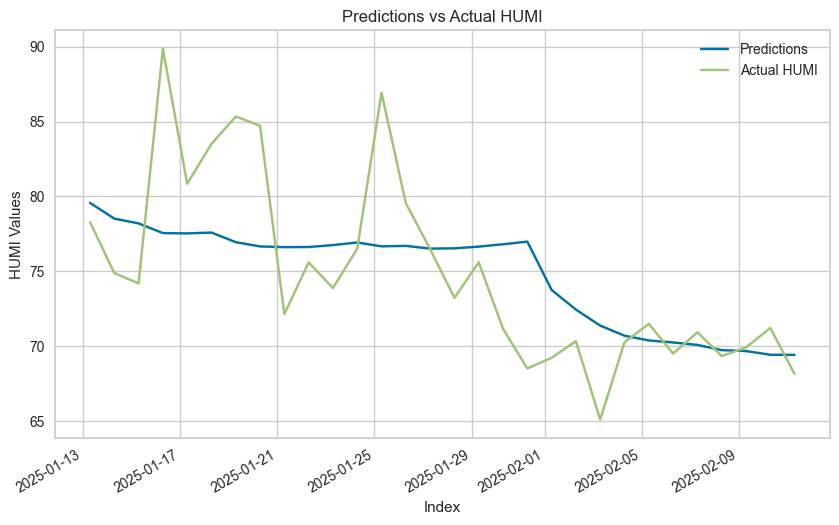

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = data_filtered.loc[start_date:end_date]
# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ result ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏° predictions ‡∏Å‡∏±‡∏ö pm_10
result_plot = pd.concat([result['prediction_label'], real_data['humidity']], axis=1)
result_plot.columns = ['Predictions', 'Actual HUMI']  # ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
result_plot.plot(figsize=(10, 6))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Predictions vs Actual HUMI')
plt.xlabel('Index')
plt.ylabel('HUMI Values')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

In [33]:
y_true = test_data["humidity"][:"2025-2-10"]
y_pred = result['prediction_label'].shift(-1).dropna(axis=0)

In [34]:
# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: 0.4117
Mean Absolute Error (MAE): 3.4224
Root Mean Squared Error (RMSE): 4.6886
Mean Absolute Percentage Error (MAPE): 4.39%
Accuracy: 95.61%


Processing model: LinearRegression


Processing model: Ridge


Processing model: Lasso


Processing model: LassoLars


Processing model: ElasticNet


Processing model: BayesianRidge


Processing model: ExtraTreesRegressor


Processing model: RandomForestRegressor


Processing model: HuberRegressor


Processing model: AdaBoostRegressor


Processing model: GradientBoostingRegressor


Processing model: LGBMRegressor


Processing model: KNeighborsRegressor


  File "d:\Normal File\Coder\MINI_PROJECT_1-2\pycaret_venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Processing model: DecisionTreeRegressor


Processing model: OrthogonalMatchingPursuit


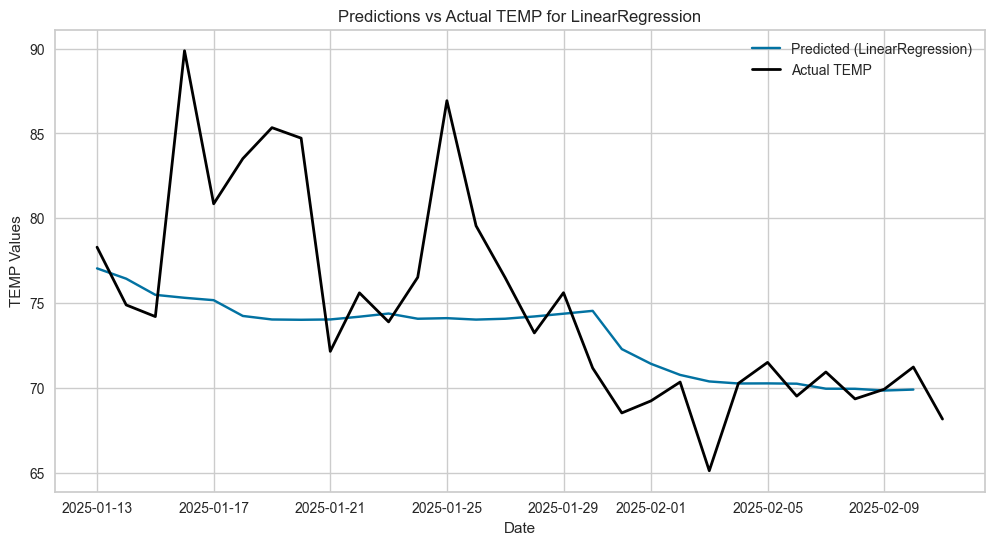

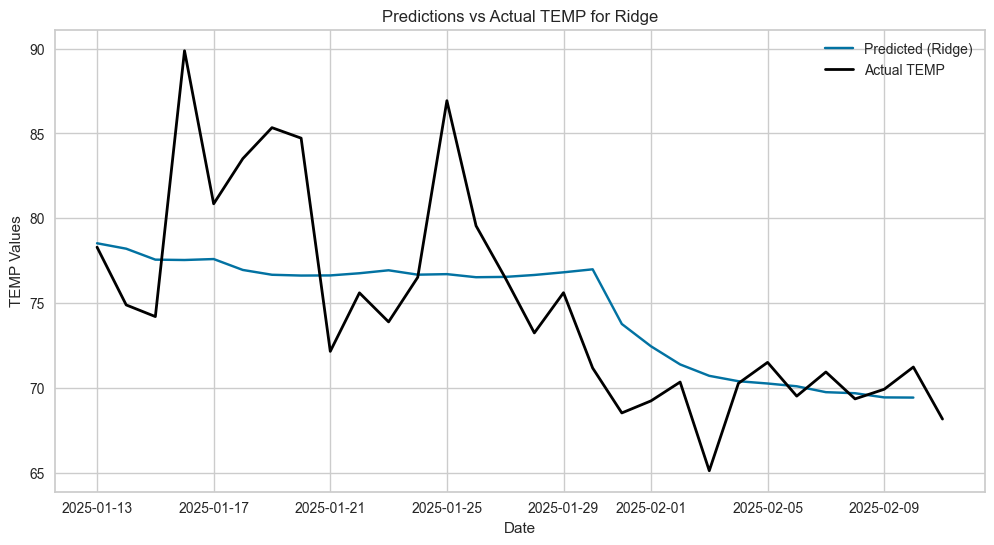

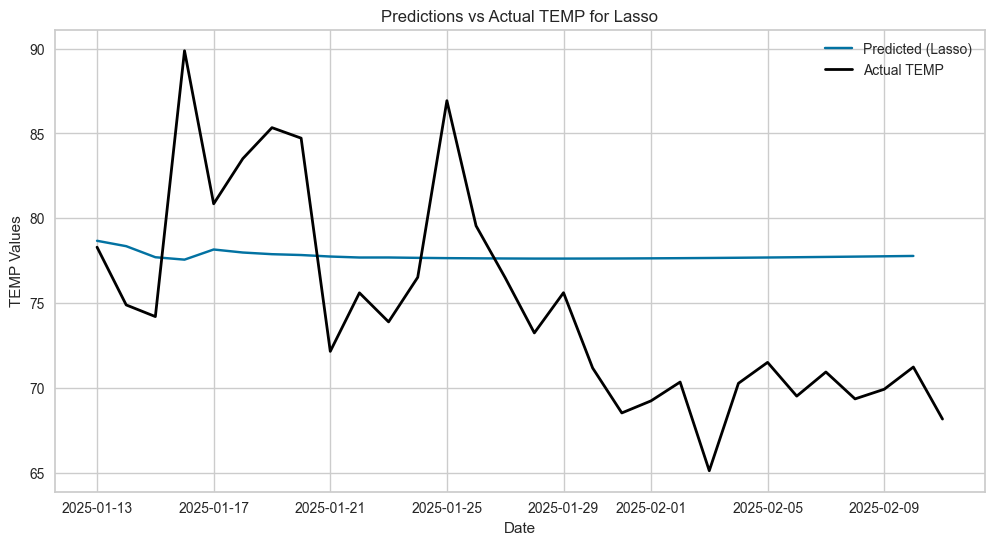

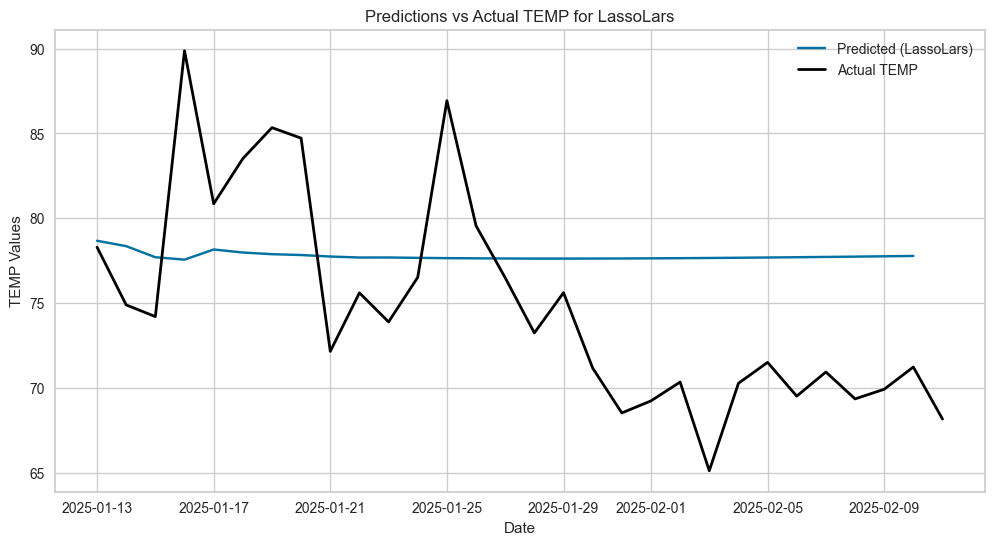

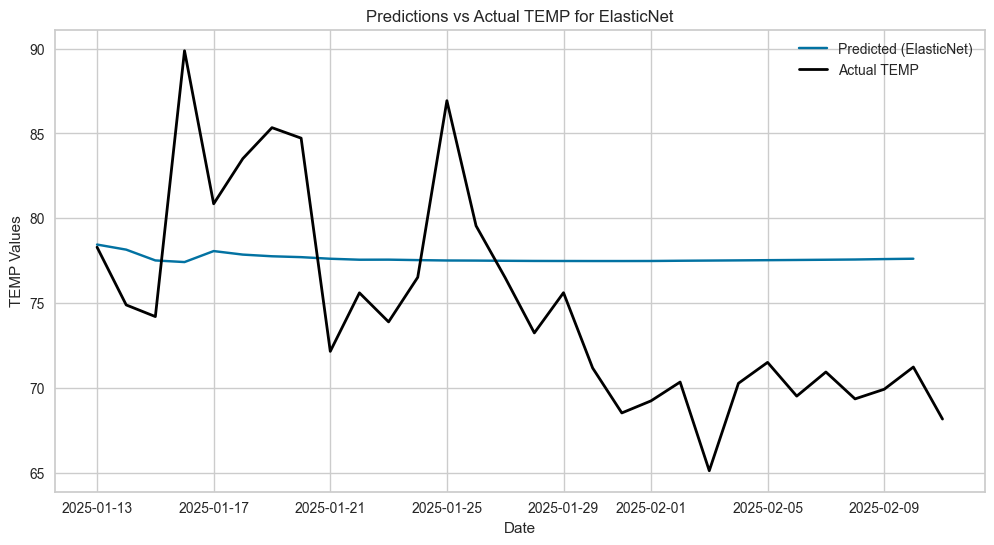

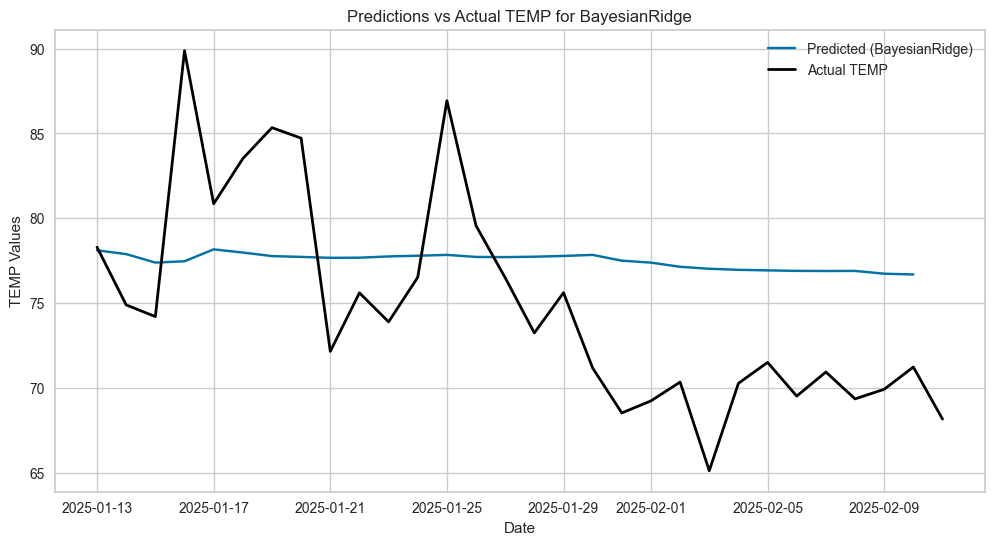

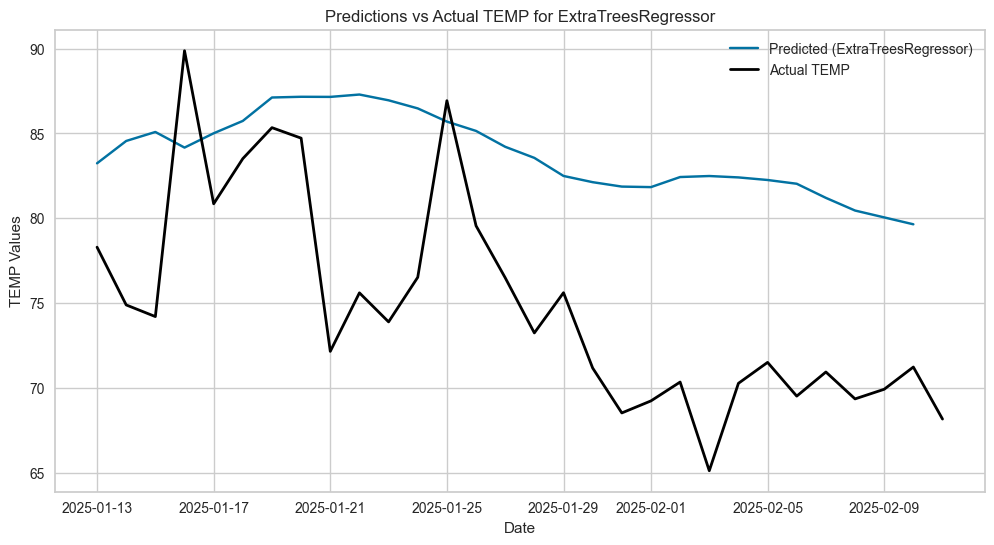

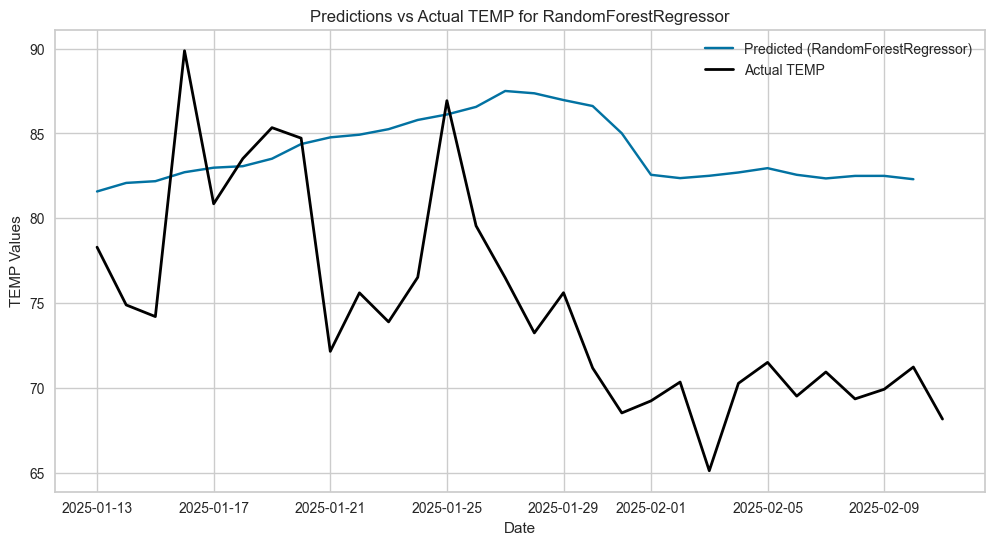

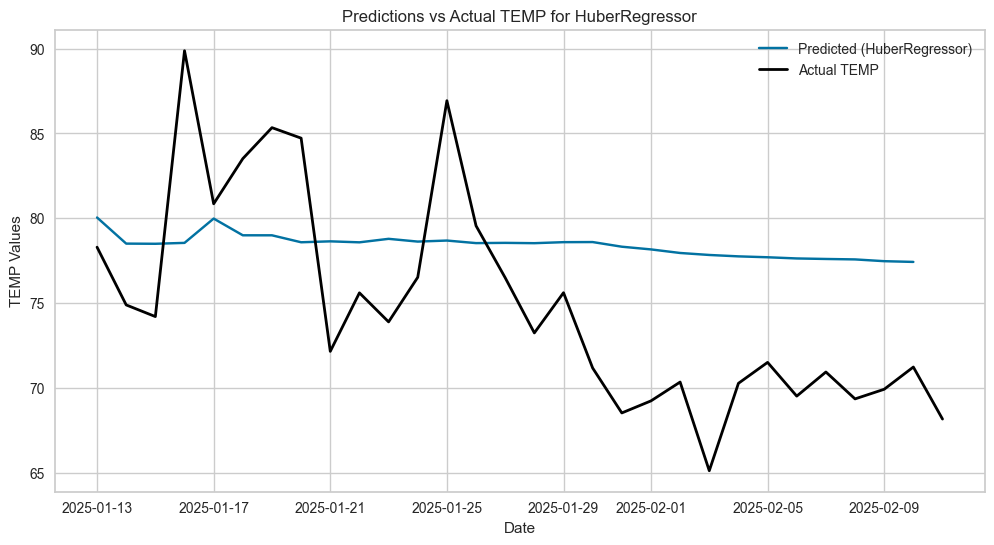

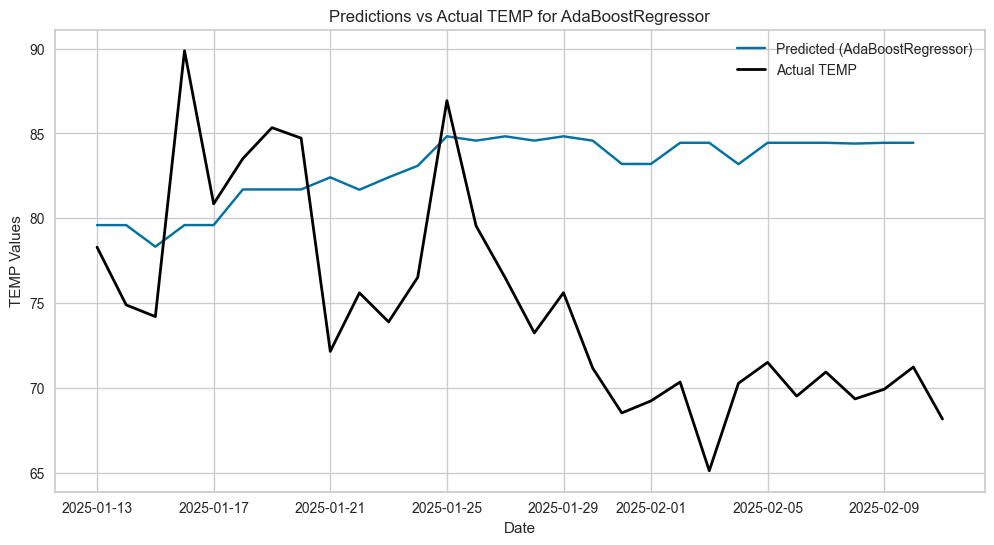

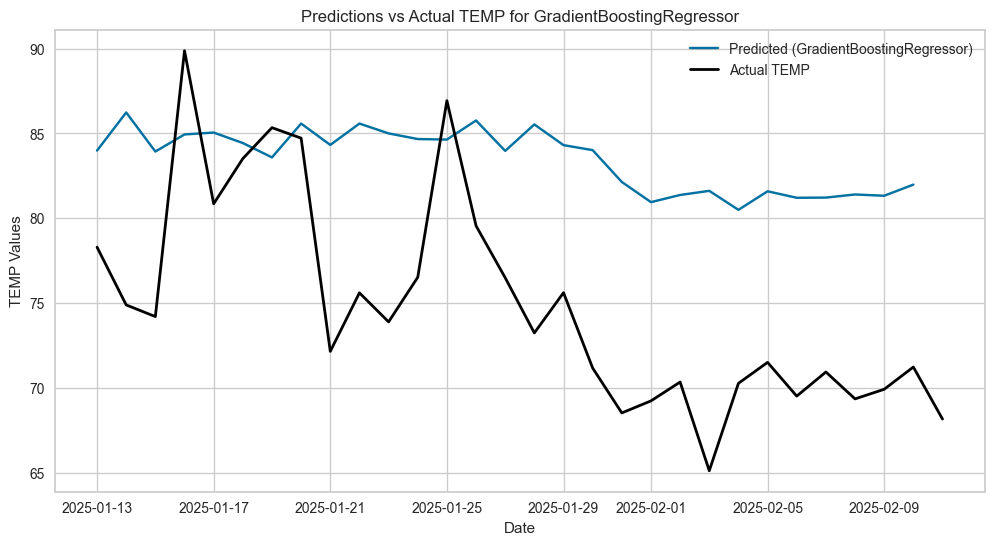

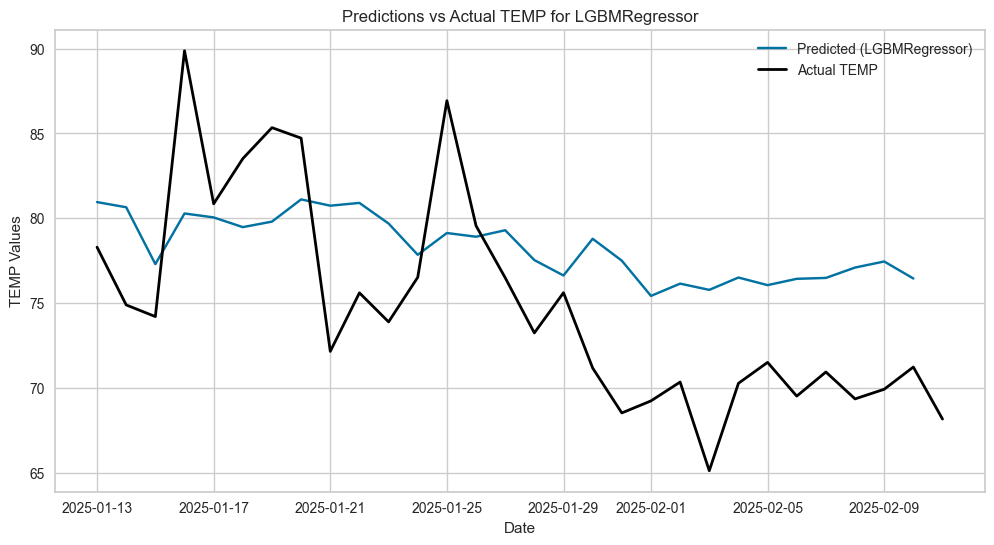

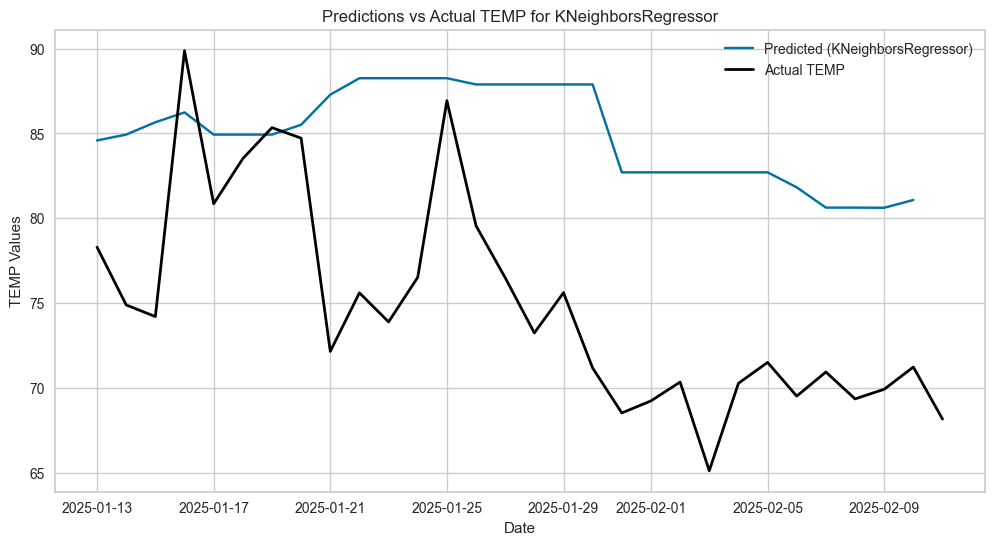

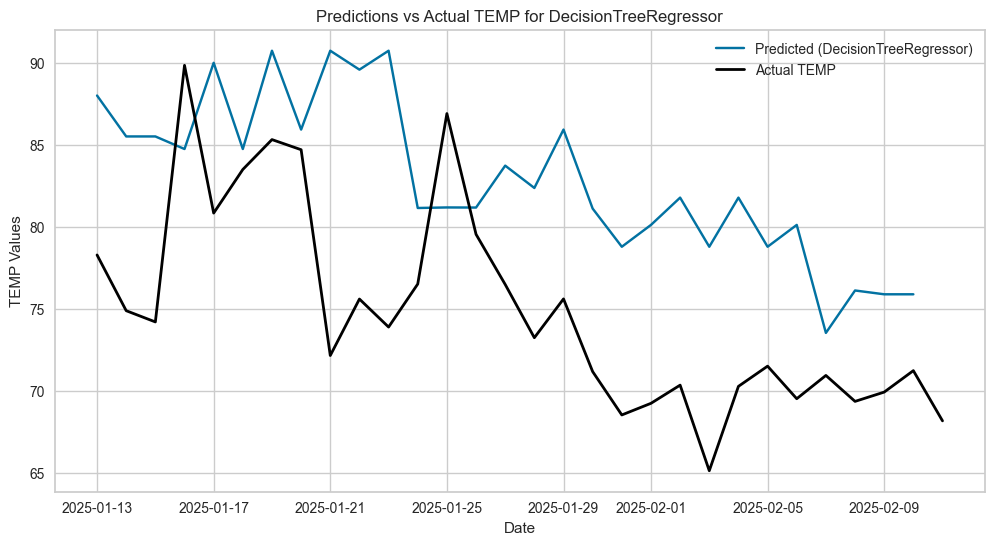

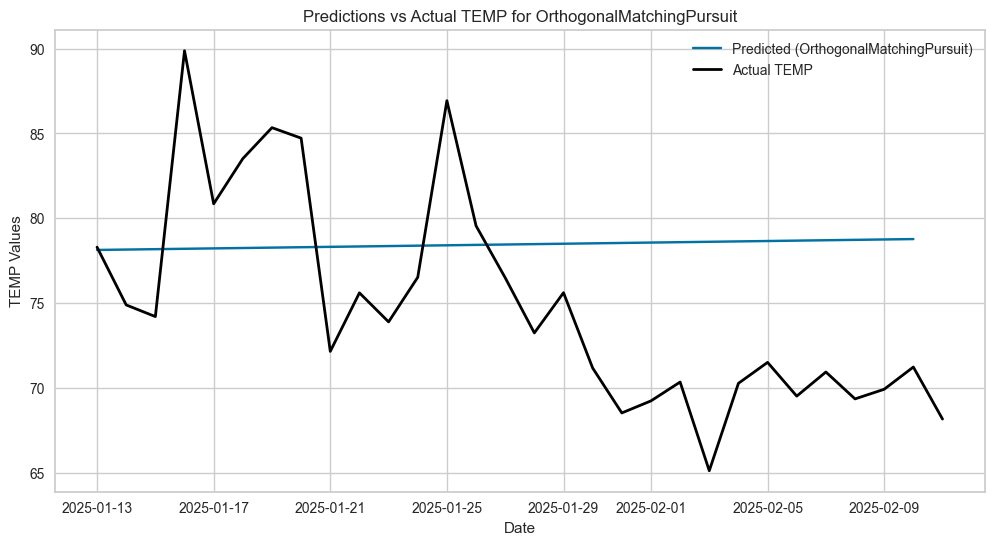

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# ‡πÅ‡∏õ‡∏•‡∏á index ‡πÄ‡∏õ‡πá‡∏ô datetime ‡πÅ‡∏•‡∏∞‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å
x = data_filtered.copy()
x.index = pd.to_datetime(x.index).normalize()

# ‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
result_dict = {}

# ‡∏£‡∏≤‡∏¢‡∏ä‡∏∑‡πà‡∏≠‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏à‡∏≤‡∏Å best_list
model_names = {model.__class__.__name__: model for model in best}

start_date = "2025-01-13"
end_date = "2025-02-11"

# ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏ú‡πà‡∏≤‡∏ô‡∏ó‡∏∏‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
for model_name, model in model_names.items():
    print(f"Processing model: {model_name}")

    data_compare = x.loc[:'2025-01-12'].copy()  # ‡πÉ‡∏ä‡πâ copy() ‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô Warning
    result = pd.DataFrame()

    for date in pd.date_range(start=start_date, end=end_date, freq="D"):
        # ‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà
        date = pd.to_datetime(date).normalize()  # ‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£ date

        # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡πÉ‡∏ô x ‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ô‡∏µ‡πâ‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà
        if date not in x.index:
            print(f"‚ö†Ô∏è Warning: Date {date} not found in x index.")
            continue

        # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£
        test_1 = x.loc[[date]].copy()

        # ‡πÉ‡∏™‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ
        data_compare = pd.concat([data_compare, test_1], axis=0)

        # ‡πÄ‡∏û‡∏¥‡πà‡∏° lag feature
        for i in range(1, lag_size + 1):
            test_1[f'humidity_lag_{i}'] = data_compare['humidity'].shift(i).iloc[-1]

        # ‡∏•‡∏ö‡∏Ñ‡πà‡∏≤ NaN ‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£ shift
        test_1 = test_1.dropna()

        # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤
        predict_test_1 = exp1.predict_model(model, data=test_1)

        # ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï data_compare
        predict_test_1.index = [date]  # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î index ‡πÄ‡∏õ‡πá‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå
        data_compare.loc[date, 'humidity'] = predict_test_1['prediction_label'].values[0]

        # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
        result = pd.concat([result, predict_test_1], axis=0)

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ô‡∏µ‡πâ‡∏•‡∏á dict
    result_dict[model_name] = result

# --------------------------------------------
# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏ó‡∏∏‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
# --------------------------------------------
real_data = x.loc[start_date:end_date]

# ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
for model_name, result in result_dict.items():
    plt.figure(figsize=(12, 6))
    
    result_plot = pd.concat([result['prediction_label'].shift(-1), real_data['humidity']], axis=1)
    result_plot.columns = ['Predictions', 'Actual TEMP']

    plt.plot(result_plot.index, result_plot['Predictions'], label=f"Predicted ({model_name})")
    plt.plot(real_data.index, real_data['humidity'], label="Actual TEMP", color="black", linewidth=2)
    
    # ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏Å‡∏£‡∏≤‡∏ü
    plt.title(f'Predictions vs Actual TEMP for {model_name}')
    plt.xlabel('Date')
    plt.ylabel('TEMP Values')
    plt.legend()

    # ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
    plt.show()

In [36]:
# --------------------------------------------
# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡πÅ‡∏•‡∏∞‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏• Regression Metrics (‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü)
# --------------------------------------------
for model_name, result in result_dict.items():
    y_true = x.loc[start_date:end_date, 'humidity']  # ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
    y_pred = result['prediction_label'].shift(-1)  # ‡∏Ñ‡πà‡∏≤‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå

    # ‡∏•‡∏ö NaN ‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£ shift
    valid_idx = y_pred.dropna().index
    y_true = y_true.loc[valid_idx]
    y_pred = y_pred.loc[valid_idx]

    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    accuracy = 100 - mape  # ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô Accuracy %

    # ‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡πà‡∏≤ Metrics ‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ô‡∏µ‡πâ
    print("\nüìä Model Performance Metrics:")
    print(f"Model: {model_name}")
    print(f"R¬≤ Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Accuracy: {accuracy:.2f}%")
    print("-" * 50)


üìä Model Performance Metrics:
Model: LinearRegression
R¬≤ Score: 0.2093
Mean Absolute Error (MAE): 3.6129
Root Mean Squared Error (RMSE): 5.4357
Mean Absolute Percentage Error (MAPE): 4.51%
Accuracy: 95.49%
--------------------------------------------------

üìä Model Performance Metrics:
Model: Ridge
R¬≤ Score: 0.4117
Mean Absolute Error (MAE): 3.4224
Root Mean Squared Error (RMSE): 4.6886
Mean Absolute Percentage Error (MAPE): 4.39%
Accuracy: 95.61%
--------------------------------------------------

üìä Model Performance Metrics:
Model: Lasso
R¬≤ Score: -0.1713
Mean Absolute Error (MAE): 5.8177
Root Mean Squared Error (RMSE): 6.6158
Mean Absolute Percentage Error (MAPE): 7.86%
Accuracy: 92.14%
--------------------------------------------------

üìä Model Performance Metrics:
Model: LassoLars
R¬≤ Score: -0.1713
Mean Absolute Error (MAE): 5.8177
Root Mean Squared Error (RMSE): 6.6157
Mean Absolute Percentage Error (MAPE): 7.86%
Accuracy: 92.14%
----------------------------------